In [0]:
import numpy as np
from scipy.misc import imread, imresize
from glob import glob # helps find files in a folder
import os  # to navigate through filesystem
from google.colab import drive # needed to connect to drive
import matplotlib.pyplot as plt # need to plot images

In [2]:
drive.mount('/content/drive') # mounts drive to colaboratory

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# navigate through filesystem to data folders
os.chdir('drive/My Drive/DeepLearningFall2018/')

In [7]:
os.listdir() # list all files and folders in this location

['ngrok',
 'DeepLearningFall2018Pretest.gdoc',
 'DeepLearning_Fall2018_HW1.ipynb',
 'Linear Algebra Overview.gslides',
 'turing.jpeg',
 'Basic_Operations.ipynb',
 'Python Numpy_Intro.ipynb',
 'perceptron_image.png',
 'Perceptrons.ipynb',
 'DeepLearning_Fall2018_HW1_answerkey.ipynb',
 'linear_data.csv',
 'DIS_Schedule.gsheet',
 'Homework2_answers.ipynb',
 'Convolutional Neural Networks Lecture 2.gslides',
 'cifar-10-batches-py',
 'DeepLearningFall2018_schedule.gsheet',
 'Colab_Intro.ipynb',
 'iris_flower_data.csv',
 "Midterm_Practice2_teacher's edition.ipynb",
 'Midterm_Practice2.ipynb',
 'Midterm_Practice.ipynb',
 'Midterm_Practice_TeachersEdition.ipynb',
 'CNN_MichaelTeti.ipynb',
 'Midterm_Exam.ipynb',
 'Midterm_Exam_Answers.ipynb',
 'Grades.gsheet',
 'mnist',
 'ngrok-stable-linux-amd64.zip',
 'Multilayer_perceptron_MichaelTeti.ipynb',
 'Evolution of CNNs.gslides',
 'Data',
 'residual_block.py',
 'residual_block.ipynb',
 'Load_Data_Example.ipynb']

In [0]:
from residual_block import *

In [0]:
os.chdir('Data')

In [0]:
os.chdir('Moldy_Bread')

In [0]:
def image_loader(img_size):
  img_names = glob('*') # get all filenames in this location
  imgs = np.zeros([len(img_names), img_size, img_size, 3])
  
  for indx, img_name in enumerate(img_names):
    img = imread(img_name) # read in the image
    
    # if img is not correct size, resize it
    if img.shape[0] != img_size or img.shape[1] != img_size:
      img = imresize(img, [img_size, img_size])
      
    imgs[indx, ...] = img  # add that image to empty tensor
    
  return imgs

In [15]:
# call the function to load in the images in this directory
moldy_bread_imgs = image_loader(150)

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


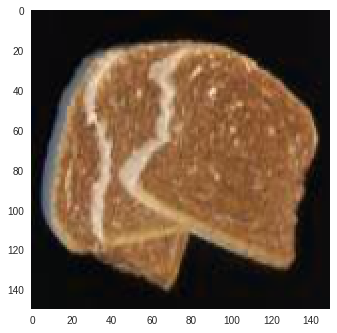

In [16]:
plt.imshow(moldy_bread_imgs[0, :, :, ::-1])  # sanity check - show first image
plt.grid(False)

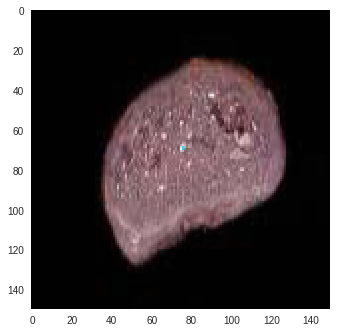

In [17]:
plt.imshow(moldy_bread_imgs[-1, :, :, ::-1]) # sanity check - plot last image
plt.grid(False)

In [0]:
os.chdir('..') # go back a folder
os.chdir('Bread') # go into bread folder

In [19]:
bread_images = image_loader(150) # load in the bread images

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


KeyboardInterrupt: ignored

In [0]:
bread_images.shape

In [0]:
plt.imshow(bread_images[0, :, :, ::-1]) # show first image from bread_images
plt.grid(False)

In [0]:
plt.imshow(bread_images[-1, :, :, ::-1]) # show last image from bread_images
plt.grid(False) # get rid of the grid

In [0]:
bread_images.shape

In [0]:
moldy_bread_imgs.shape

In [0]:
# make labels for moldy images
moldy_labels = np.zeros([moldy_bread_imgs.shape[0], 2])
moldy_labels[:, 0] = 1. 
print(moldy_labels)

In [0]:
# make labels for regular bread images
bread_labels = np.zeros([bread_images.shape[0], 2])
bread_labels[:, 1] = 1.
print(bread_labels)

In [0]:
# create the input layer for the network
input_layer = input_data([None, 150, 150, 3])

# first convolution --- 75 x 75 x 64
conv1 = conv_2d(input_layer, 64, 7, stride=2, activation='relu')

# max pooling --- 37 x 37 x 64
pool1 = max_pool_2d(conv1, 3, 2)

# residual blocks 1-3 --- 37 x 37 x 64
residual_block1 = residual_block(pool1, # input to this layer
                                 64, # number of features to look for
                                 3, # filter size
                                 3) # number of residual blocks

# residual blocks 4-7 --- 18 x 18 x 128
residual_block2 = residual_block(residual_block1, # input 
                                 128, # num. features to look for
                                 3, # filter size
                                 4, # number of blocks
                                 2) # stride length 

# residual blocks 8-13 --- 9 x 9 x 256
residual_block3 = residual_block(residual_block2,
                                 256,
                                 3,
                                 6, 
                                 2)

# residual blocks 14-16 --- 4 x 4 x 512
residual_block4 = residual_block(residual_block3,
                                 512,
                                 3,
                                 3,
                                 2)

# global average pooling --- 512
gap = global_avg_pool(residual_block4)

# output layer
output_layer = fully_connected(gap, 2, activation='softmax')